In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('other/train.csv')

(array([1.274e+03, 3.300e+01, 6.800e+01, 4.500e+01, 3.000e+01, 8.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  55.2, 110.4, 165.6, 220.8, 276. , 331.2, 386.4, 441.6,
        496.8, 552. ]),
 <a list of 10 Patch objects>)

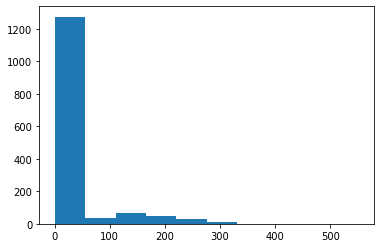

In [4]:
features = df[['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]
target = df['SalePrice']
plt.hist(features['EnclosedPorch'])

In [5]:
features.describe()

,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,21.954110,3.409589,15.060959,2.758904,43.489041
std,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,552.000000,508.000000,480.000000,738.000000,15500.000000


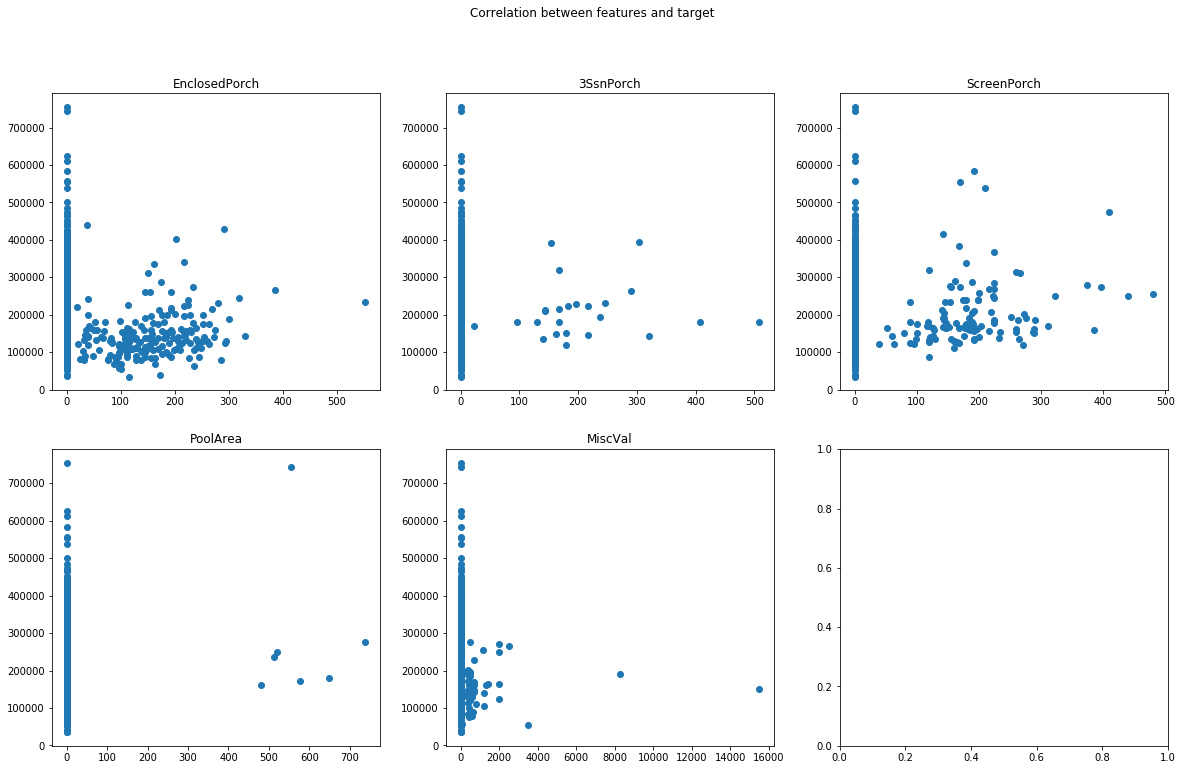

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Correlation between features and target')
axs[0, 0].scatter(features['EnclosedPorch'], target)
axs[0, 0].set_title('EnclosedPorch')
axs[0, 1].scatter(features['3SsnPorch'], target)
axs[0, 1].set_title('3SsnPorch')
axs[0, 2].scatter(features['ScreenPorch'], target)
axs[0, 2].set_title('ScreenPorch')
axs[1, 0].scatter(features['PoolArea'], target)
axs[1, 0].set_title('PoolArea')
axs[1, 1].scatter(features['MiscVal'], target)
axs[1, 1].set_title('MiscVal')
df.drop(axis=1, labels=['3SsnPorch', 'PoolArea', 'MiscVal'], inplace=True)

In [7]:
X = np.log(df['EnclosedPorch'].loc[df['EnclosedPorch'] > 0]).values.reshape(-1, 1)
Y = np.log(df['SalePrice'].loc[df['EnclosedPorch'] > 0]).values.reshape(-1, 1)

In [8]:
reg = LinearRegression()
reg.fit(X, Y)
y_pred = reg.predict(X)

0.02651913202234457

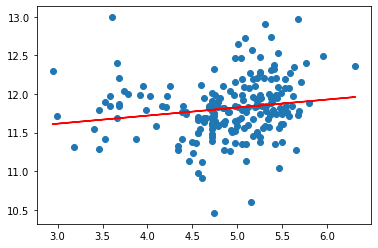

In [9]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
reg.score(X, Y)

In [10]:
X = np.log(df['ScreenPorch'].loc[df['ScreenPorch'] > 0]).values.reshape(-1, 1)
Y = np.log(df['SalePrice'].loc[df['ScreenPorch'] > 0]).values.reshape(-1, 1)

In [11]:
reg = LinearRegression()
reg.fit(X, Y)
y_pred = reg.predict(X)

0.10824535649914413

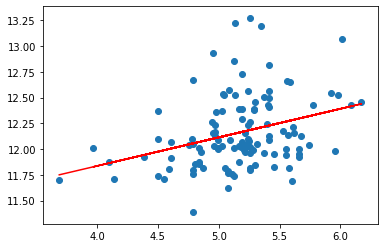

In [12]:
plt.scatter(X, Y)
plt.plot(X, y_pred, color='red')
reg.score(X, Y)